## Pset 1

### Problem 1

I confirm that I read the syllabus and am fully aware of key dates, deadlines, and rules.

### Problem 2

In [112]:
import sys
import subprocess
import matplotlib.pyplot as plt

# Install matplotlib silently
subprocess.check_call([sys.executable, "-m", "pip", "install", "matplotlib"], stdout=subprocess.DEVNULL, stderr=subprocess.DEVNULL)
subprocess.check_call([sys.executable, "-m", "pip", "install", "pandas"], stdout=subprocess.DEVNULL, stderr=subprocess.DEVNULL)
import pandas
# Read all of the files
real_gdp = pandas.DataFrame(pandas.read_csv('GDPC1.csv'))
nominal_gdp = pandas.DataFrame(pandas.read_csv('GDP.csv'))
federal_debt = pandas.DataFrame(pandas.read_csv('GFDEBTN.csv'))
real_gdp['observation_date'] = pandas.to_datetime(real_gdp['observation_date'])
nominal_gdp['observation_date'] = pandas.to_datetime(nominal_gdp['observation_date'])
federal_debt['observation_date'] = pandas.to_datetime(federal_debt['observation_date'])

#### Part 1

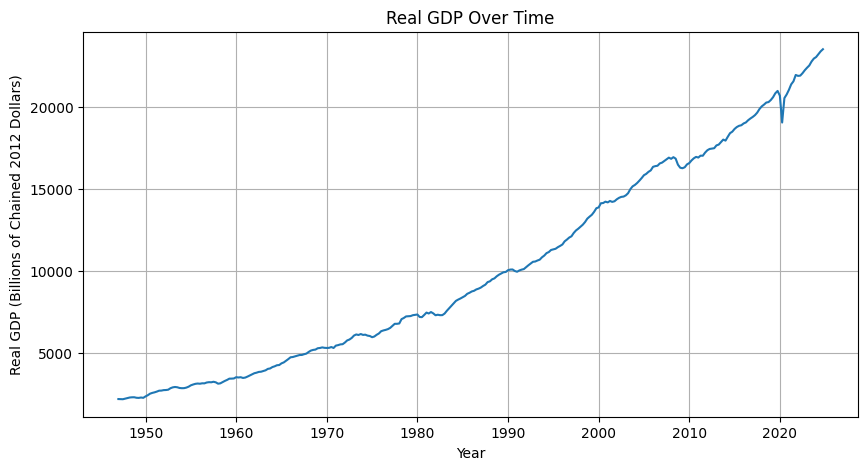

In [101]:
real_gdp['observation_date'] = pandas.to_datetime(real_gdp['observation_date'])
plt.figure(figsize=(10, 5))
plt.plot(real_gdp['observation_date'], real_gdp['GDPC1'])
plt.xlabel('Year')
plt.ylabel('Real GDP (Billions of Chained 2012 Dollars)')
plt.title('Real GDP Over Time')
plt.grid(True)
plt.show()

In [110]:
for i in range(len(real_gdp)) :
    # print(real_gdp["observation_date"][i])
    if real_gdp["observation_date"][i] == pandas.Timestamp("2019-10-01") :
        print("Real GDP in 2019, quarter 4 is", real_gdp["GDPC1"][i])
    elif real_gdp["observation_date"][i] == pandas.Timestamp("2020-04-01") :
        print("Real GDP in 2020, quarter 2 is", real_gdp["GDPC1"][i])

Real GDP in 2019, quarter 4 is 20985.448
Real GDP in 2020, quarter 2 is 19056.617


The 2019 quarter 4 levels of real GDP is 20985.448, and the 2020 quarter 2 levels of real GDP are 19056.617.

#### Part 2

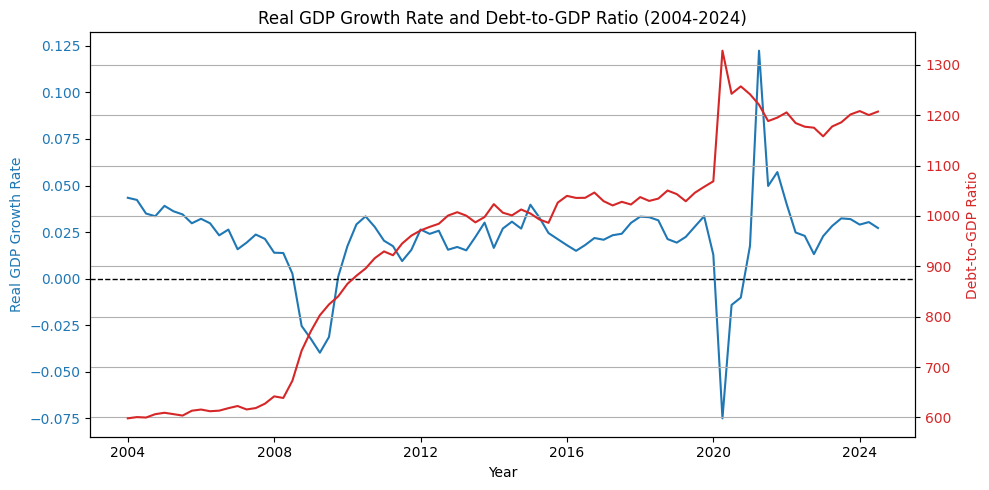

In [ ]:
df = nominal_gdp.merge(real_gdp, on="observation_date")
df = df.merge(federal_debt, on="observation_date")
df.head(10)
df["ratio of debt: GDP"] = df["GFDEBTN"] / df["GDP"] * 1/1000
df["real_gdp_growth"] = (df["GDPC1"] - df["GDPC1"].shift(4)) / df["GDPC1"].shift(4) 
df = df[(df["observation_date"] >= "2004-01-01") & (df["observation_date"] <= "2024-12-31")]
fig, ax1 = plt.subplots(figsize=(10, 5))
ax1.set_xlabel("Year")
ax1.set_ylabel("Real GDP Growth Rate", color="tab:blue")
ax1.plot(df["observation_date"], df["real_gdp_growth"], color="tab:blue", label="Real GDP Growth Rate")
ax1.tick_params(axis="y", labelcolor="tab:blue")
ax1.axhline(y=0, color="black", linestyle="--", linewidth=1)

# Create second y-axis
ax2 = ax1.twinx()
ax2.set_ylabel("Debt-to-GDP Ratio", color="tab:red")
ax2.plot(df["observation_date"], df["ratio of debt: GDP"], color="tab:red", label="Debt-to-GDP Ratio")
ax2.tick_params(axis="y", labelcolor="tab:red")

# Title and grid
plt.title("Real GDP Growth Rate and Debt-to-GDP Ratio (2004-2024)")
fig.tight_layout()
plt.grid(True)
plt.show()

### Problem 3

#### Part 1

The final goods in this economy are instant noodles ($600$ dollars) and the portion of wheat sold as a final good. The wheat company's total revnue is $250$ dollars, but some of that revenue is sold to the noodle company as an intermediate good (100 dollars). Thus, the wheat is sold as a final good at $250 - 100 = 150$ dollars.

The GDP is the value of the final goods ($150$ dollars for wheat and $600$ dollars for instant noodles), which amounts to $750$ dollars.

### Part 2

The wheat company has a revenue of $250$ dollars, and since no intermediate goods are used, it has $250$ dollars in added value. As for the instant noodle company, it has a revenue of $600$ dollars and $100$ dollars worth of intermediate good purchases (wheat). So, its value added is $600 - 100 = 500$ dollars. The total value added is $250$ dollars (wheat) plus $500$ dollars (instant) noodles, which amounts to $750$ dollars.

#### Part 3

The wheat company has $90$ dollars in wages and $160$ dollars in profit; the instant noodle company has $60$ dollars in wages and 440 dollars in profit. Thus, the total income is $90$ + $160$ + $60$ + $440$ = $750$ dollars.

### Problem 4

#### Part 1

- $c_0$ represents autonomous consumption, which is the level of consumption that occurs even if the disposable income ($Y_d$) is zero. It captures factors like basic survival consumption and consumer confidence.

- $c_1$ is the marginal propensity to consume (MPC), which measures how much consumption increases for each additional unit of disposable income. Since $0 < c_1 < 1$, it means that consumers spend a fraction of each dollar they earn.

#### Part 2

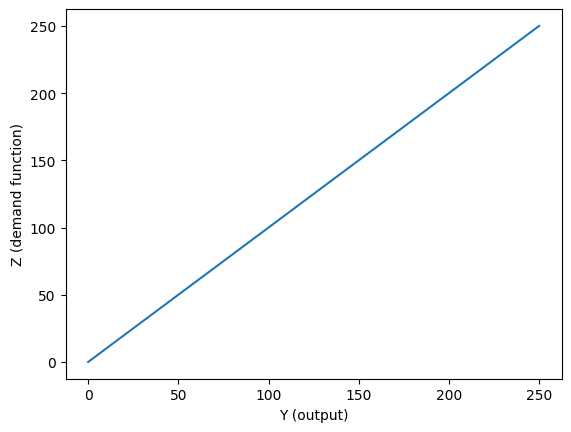

In [96]:
import sys
import subprocess

# Install matplotlib silently
subprocess.check_call([sys.executable, "-m", "pip", "install", "matplotlib"], stdout=subprocess.DEVNULL, stderr=subprocess.DEVNULL)
subprocess.check_call([sys.executable, "-m", "pip", "install", "numpy"], stdout=subprocess.DEVNULL, stderr=subprocess.DEVNULL)

import matplotlib.pyplot as plt
import numpy as np

xpoints = np.array([0, 250])
ypoints = np.array([0, 250])

plt.xlabel("Y (output)")
plt.ylabel("Z (demand function)")

plt.plot(xpoints, ypoints)
plt.show()

#### Part 3

The goods market equilibrium is given by
$$Y = Z = C + I + G.$$
Substituting $C = c_0 + c_1 Y_D$ and $Y_D = Y - T$:
$$Y = (c_0 + c_1(Y-T)) + I + G$$
and expanding,
$$Y = c_0 + c_1 Y - c_1 T _ I + G.$$
Rearranging,
$$Y - c_1Y = c_0 + I + G - c_1 T \Longrightarrow Y(1 - c_1) = c_0 + I + G - c_1 T \Longrightarrow Y = \frac{c_0 + I + G - c_1T}{1 - c_1}.$$

#### Part 4

The multiplier is $$\frac{1}{1 - c_1}.$$
This tells us that an increase in autonomous spending (such as $c_0$) increases the equilibrium output by a factor of $\frac{1}{1 - c_1}$. The larger $c_1$ (MPC), the stronger the effect.

#### Part 5

Private saving is defined as
$$S = Y - T - C.$$
Substituting $C = c_0 + c_1 Y_D$ and $Y_d = Y - T$:
$$S = Y - T - (c_0 + c_1(Y - T)).$$
Expanding:
$$S = Y - T - c_0 - c_1 Y + c_1 T = (1 - c_1)Y - (1 - c_1)T - c_0.$$
Using the equilibrium, $Y = \frac{c_0 + I + G - c_1 T}{1 - c_1}$, we can rewrite $S$ in terms of $I$, $T$, $G$:
$$S = (1 - c_1) \cdot \frac{c_0 + I + G - c_1 T}{1 - c_1} - (1 - c_1)T - c_0 = c_0 + I + G - c_1T - (1 - c_1)T - c_0 =I + G - T.$$
Thus, the final expression is 
$$S= I + G - T.$$

#### Part 6

If $G = T + B$ and $B = 0$, then $G = T$. The equilibrium simplifies to 
$$S = I.$$
This means that in a balanced budget scenario (no government spending), private savings must exactly equal investment.

#### Part 7

From the expression for $S$:
$$S = (1 - c_1)Y - (1 - c_1)T - c_0 = -c_0 + (1 - c_1)Y_D.$$
So,
$$s_0 = -c_0, s_1 = 1 - c_1.$$
$s_0$ represents the level of saving when disposable income is zero (opposite of autonomous consumption), and $s_1 = 1 - c_1$ is the marginal propensity to save (MPS). Since the multiplier is $\frac{1}{1 -c_1}$, this shows that $s_1$ is the inverse of the multiplier in determining how saving adjust to income prices.